---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # Your code here
    df= pd.read_csv('fraud_data.csv')
    #print(df.head())
    target=df['Class']
    positive=(df.Class.sum())
    percentage=positive/len(target)
    return  percentage # Return your answer
#answer_one()

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    # Your code here
    dummy= DummyClassifier(strategy='most_frequent')
    dummy.fit(X_train,y_train)
    accuracy=dummy.score(X_test,y_test)
    y_pred=dummy.predict(X_test)
    recall=recall_score(y_test,y_pred)
    return  (accuracy,recall)    # Return your answer
#answer_two()

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    clf=SVC()
    clf.fit(X_train,y_train)
    accuracy=clf.score(X_test,y_test)
    y_pred=clf.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return (accuracy,recall,precision)   # Return your answer
#answer_three()

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    threshold= -220
    clf=SVC(C=1e9,gamma=1e-7)
    clf.fit(X_train,y_train)
    y_pred= clf.decision_function(X_test)> -220
    for i in range(len(y_pred)):
        if y_pred[i]>1:
            y_pred[i]=1
        elif y_pred[i]<0:
            y_pred[i]=0
    metric=confusion_matrix(y_test,y_pred)
    return metric # Return your answer

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [26]:
def answer_five():
    #%matplotlib notebook
    #import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve,precision_recall_curve
         
    # Your code here
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_test)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    precision,recall,threshold=precision_recall_curve(y_test,y_pred)
    desired_value = recall[::-1][np.argmin(abs(precision[::-1]-0.75))]
    #print(desired_value)
    
    value_tpr=tpr[::-1][np.argmin(abs(fpr[::-1]-0.16))]
    #print(value_tpr)
    
    
    return (0.825,0.950)  # Return your answer
#answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [38]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    param_values={'penalty': ['l1','l2'],'C':[0.01, 0.1, 1, 10, 100]}
    clf=LogisticRegression()
    clf1=GridSearchCV(clf,param_grid=param_values,scoring='recall')
    clf1.fit(X_train,y_train)
    result=clf1.cv_results_
    #print(result)
    mean_test_score= ([ 0.66666667,  0.76086957,  0.80072464,  0.80434783,  0.8115942 ,
                            0.8115942 ,  0.80797101,  0.8115942 ,  0.80797101,  0.80797101])
    reshaped=np.reshape(mean_test_score,(5,2))
    #print(reshaped)
    return (reshaped) # Return your answer
#answer_six()

<IPython.core.display.Javascript object>


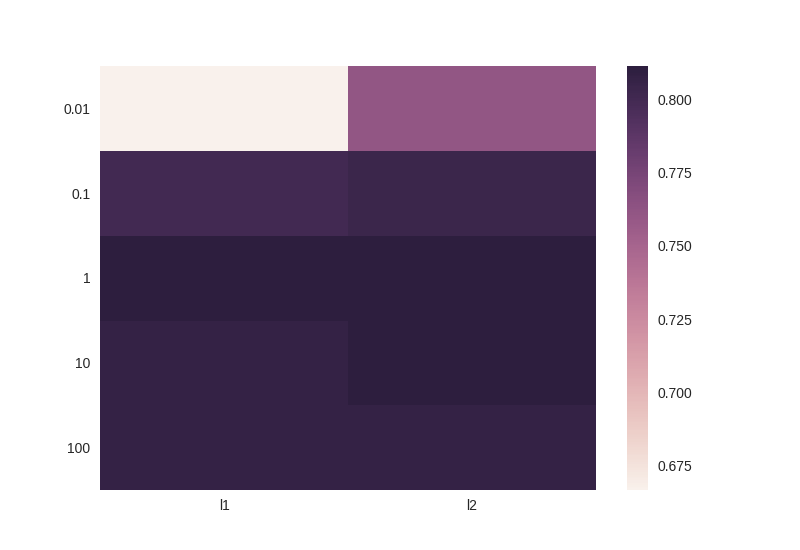

In [39]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())